<a href="https://colab.research.google.com/github/CodeGreatCommander/CourseOfStudy/blob/main/COS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyPDF2
from PyPDF2 import PdfReader
def get_courses(dept):
  def extract_pages(text):
    t=[]
    with open("cos.pdf","rb") as pd:
      pdf = PdfReader(pd)
      for page_num in range(len(pdf.pages)):
        page=pdf.pages[page_num].extract_text()
        f=True
        for i in text:
          if i not in page:
            f=False
            break
        if(f):t.append(page)
    return t
  text=extract_pages([dept,"Institute Core"])
  tC=["Institute Core : Basic Sciences","Institute Core: Engineering Arts and Sciences","Programme-Linked Basic","Departmental Core"]
  print(text)
  text_1=text[0].split("\n")
  f=False
  last=""
  map={}
  def check(s,x):
    f=False
    for a in s:
      if(a in x):
        return a
    return False
  for x in text_1:
    if(" Total Credits" in x):
      f=False
    if(f and x[0]!=" "):
      map[last].append(x[:6])
    p=check(tC,x)
    if(p!=False):
      f=True
      last=p
      map[p]=[]
  return map

In [2]:
departments=["MT1","CS1","PH1","CE1"]
loc={}
for x in departments:
  loc[x]=get_courses(x)

['71The overall Credit Structure\nCourse Category Credits\nInstitute Core Courses\n Basic Sciences (BS)  24\n Engineering Arts and Science (EAS)  19\n Humanities and Social Sciences (HuSS)  15\nProgramme-linked Courses   12.5\nDepartmental Courses\n Departmental Core   63.5\n Departmental Electives  12\nOpen Category Courses  10\nTotal Graded Credit requirement  156\nNon Graded Units  11\nInstitute Core : Basic Sciences\nCML101 Introduction to Chemistry 3 1 0 4\nCMP100 Chemistry Laboratory 0 0 4 2\nMTL100 Calculus 3 1 0 4\nMTL101 Linear Algebra and Differential Equations 3 1 0 4\nPYL101 Electromagnetism & Quantum Mechanics   3 1 0 4\nPYP100 Physics Laboratory 0 0 4 2\nSBL100 Introductory Biology for Engineers 3 0 2 4\n Total Credits    24 \nInstitute Core: Engineering Arts and Sciences\nAPL100 Engineering Mechanics 3 1 0 4\nCOL100 Introduction to Computer Science 3 0 2 4\nCVL100 Environmental Science 2 0 0 2\nELL101 Introduction to Electrical Engineering 3 1 0 4\nELP101 Introduction to

In [4]:
def write_nested_dict_to_file(data, file, indent=0):
    for key, value in data.items():
        if isinstance(value, dict):
            # If the value is another dictionary, recursively write it
            file.write(' ' * indent + f'{key}:\n')
            write_nested_dict_to_file(value, file, indent + 4)
        else:
            # If the value is not a dictionary, write the key-value pair
            file.write(' ' * indent + f'{key}: {value}\n')

In [5]:
with open('output_loc.txt', 'w') as file:
    write_nested_dict_to_file(loc, file)

In [6]:
ls=set({})
for x in loc:
  for a in loc[x]:
    for q in loc[x][a]:
      ls.add(q)
print(ls)

{'MTL122', 'CVL121', 'PYL101', 'MTL106', 'PYL102', 'ELL305', 'CVL100', 'CVP261', 'CVL341', 'CVL245', 'COL352', 'MCP101', 'COL334', 'CVL381', 'CVL282', 'SBL100', 'MTL105', 'CVL244', 'PYD411', 'MTL458', 'PYP212', 'CVD411', 'MTL107', 'COL226', 'MTL100', 'PYP222', 'CVP222', 'APL108', 'ELP101', 'PYP111', 'CVP441', 'COL100', 'MTL180', 'COL202', 'PYL125', 'ESL350', 'COL215', 'PYL205', 'COL333', 'COL351', 'CML101', 'MTD411', 'MTL342', 'PYP221', 'CVL261', 'PYL208', 'COL362', 'CVL141', 'CVP342', 'COL331', 'ELP305', 'CVP281', 'MTL103', 'COP290', 'PYL209', 'ELL101', 'MTL783', 'MTL421', 'COL216', 'PYL121', 'CVP121', 'CVL242', 'CVP321', 'MTL782', 'CVL342', 'MCP100', 'PYL123', 'APL107', 'CVL281', 'PYL206', 'CML102', 'PYL202', 'PYL122', 'COD490', 'MTL102', 'CVP242', 'PYL103', 'ELL205', 'CMP100', 'COD492', 'COL106', 'MTL101', 'MTL445', 'ELL201', 'CVP243', 'PYL204', 'MTP290', 'CVL111', 'CVL243', 'MTL390', 'COL380', 'APL100', 'CVL212', 'CVL222', 'MTL104', 'PYP100', 'CVL321'}


In [7]:
def get_pre_req(ls):
  mp={}
  for x in ls:mp[x]=""
  with open("cos.pdf","rb") as pd:
      pdf = PdfReader(pd)
      for page_num in range(len(pdf.pages)):
        page=pdf.pages[page_num].extract_text()
        page=page.split("\n")
        lis=[]
        for q in range(len(page)):
          if("Pre-requisite(s)" in page[q]):
            for a in ls:
              if(q>1 and a in page[q-2]):
                mp[a]=page[q]
  return mp;

In [8]:
pre_req=get_pre_req(ls)

In [9]:
print(pre_req)

{'MTL122': 'Pre-requisite(s): MTL100', 'CVL121': '', 'PYL101': '', 'MTL106': '', 'PYL102': 'Pre-requisite(s): PYL101 ', 'ELL305': 'Pre-requisite(s): ELL201', 'CVL100': '', 'CVP261': 'Pre-requisite(s): CVL261 or Concurrent with CVL261', 'CVL341': 'Pre-requisite(s): CVL242', 'CVL245': 'Pre-requisite(s): EC35', 'COL352': '', 'MCP101': '', 'COL334': 'Pre-requisite(s): COL106, COL216', 'CVL381': 'Pre-requisite(s): CVL281 and CVL282', 'CVL282': 'Pre-requisite(s): APL107', 'SBL100': '', 'MTL105': '', 'CVL244': 'Pre-requisite(s): EC35', 'PYD411': '', 'MTL458': 'Pre-requisite(s): MTL342', 'PYP212': 'Pre-requisite(s): PYL115', 'CVD411': '', 'MTL107': '', 'COL226': 'Pre-requisite(s): COL106', 'MTL100': '', 'PYP222': 'Pre-requisite(s): PYL114', 'CVP222': 'Pre-requisite(s): CVL222 or concurrent with CVL222', 'APL108': 'Pre-requisite(s): APL100', 'ELP101': '', 'PYP111': '', 'CVP441': 'Pre-requisite(s): CVL243, CVL342', 'COL100': '', 'MTL180': '', 'COL202': '', 'PYL125': '', 'ESL350': '', 'COL215': '

In [10]:
cpre_req={}
for a in pre_req:
  b=pre_req[a]
  if(b==''):cpre_req[a]=[];continue
  b=b[17:]
  if(","in b):b=b.split(",")
  elif("or"in b):b=b.split("or")
  elif("and"in b):b=b.split("and")
  else: b=[b]
  for i in range(len(b)):
    b[i]=b[i].strip()
    if("concurrent with "in b[i].lower()):b[i]=b[i][len("concurrent with "):]
  cpre_req[a]=b
print(cpre_req)

{'MTL122': ['MTL100'], 'CVL121': [], 'PYL101': [], 'MTL106': [], 'PYL102': ['PYL101'], 'ELL305': ['ELL201'], 'CVL100': [], 'CVP261': ['CVL261', 'CVL261'], 'CVL341': ['CVL242'], 'CVL245': ['EC35'], 'COL352': [], 'MCP101': [], 'COL334': ['COL106', 'COL216'], 'CVL381': ['CVL281', 'CVL282'], 'CVL282': ['APL107'], 'SBL100': [], 'MTL105': [], 'CVL244': ['EC35'], 'PYD411': [], 'MTL458': ['MTL342'], 'PYP212': ['PYL115'], 'CVD411': [], 'MTL107': [], 'COL226': ['COL106'], 'MTL100': [], 'PYP222': ['PYL114'], 'CVP222': ['CVL222', 'CVL222'], 'APL108': ['APL100'], 'ELP101': [], 'PYP111': [], 'CVP441': ['CVL243', 'CVL342'], 'COL100': [], 'MTL180': [], 'COL202': [], 'PYL125': [], 'ESL350': [], 'COL215': ['COL100', 'ELL101'], 'PYL205': [], 'COL333': ['COL106'], 'COL351': ['COL106'], 'CML101': [], 'MTD411': [], 'MTL342': ['MTL180'], 'PYP221': ['PYL114'], 'CVL261': ['CVL111'], 'PYL208': [], 'COL362': ['COL106'], 'CVL141': [], 'CVP342': [], 'COL331': ['COL106 COP290'], 'ELP305': [], 'CVP281': ['CVL281', '

In [11]:
print(loc["MT1"])

{'Departmental Core': ['ELL305', 'ELP305', 'MTL102', 'MTL103', 'MTL104', 'MTL105', 'MTL106', 'MTL107', 'MTL122', 'MTL180', 'MTP290', 'MTL342', 'MTL390', 'MTD411', 'MTL421', 'MTL445', 'MTL458', 'MTL782', 'MTL783'], 'Institute Core : Basic Sciences': ['CML101', 'CMP100', 'MTL100', 'MTL101', 'PYL101', 'PYP100', 'SBL100'], 'Institute Core: Engineering Arts and Sciences': ['APL100', 'COL100', 'CVL100', 'ELL101', 'ELP101', 'MCP100', 'MCP101'], 'Programme-Linked Basic': ['COL106', 'ELL201', 'PYL102']}


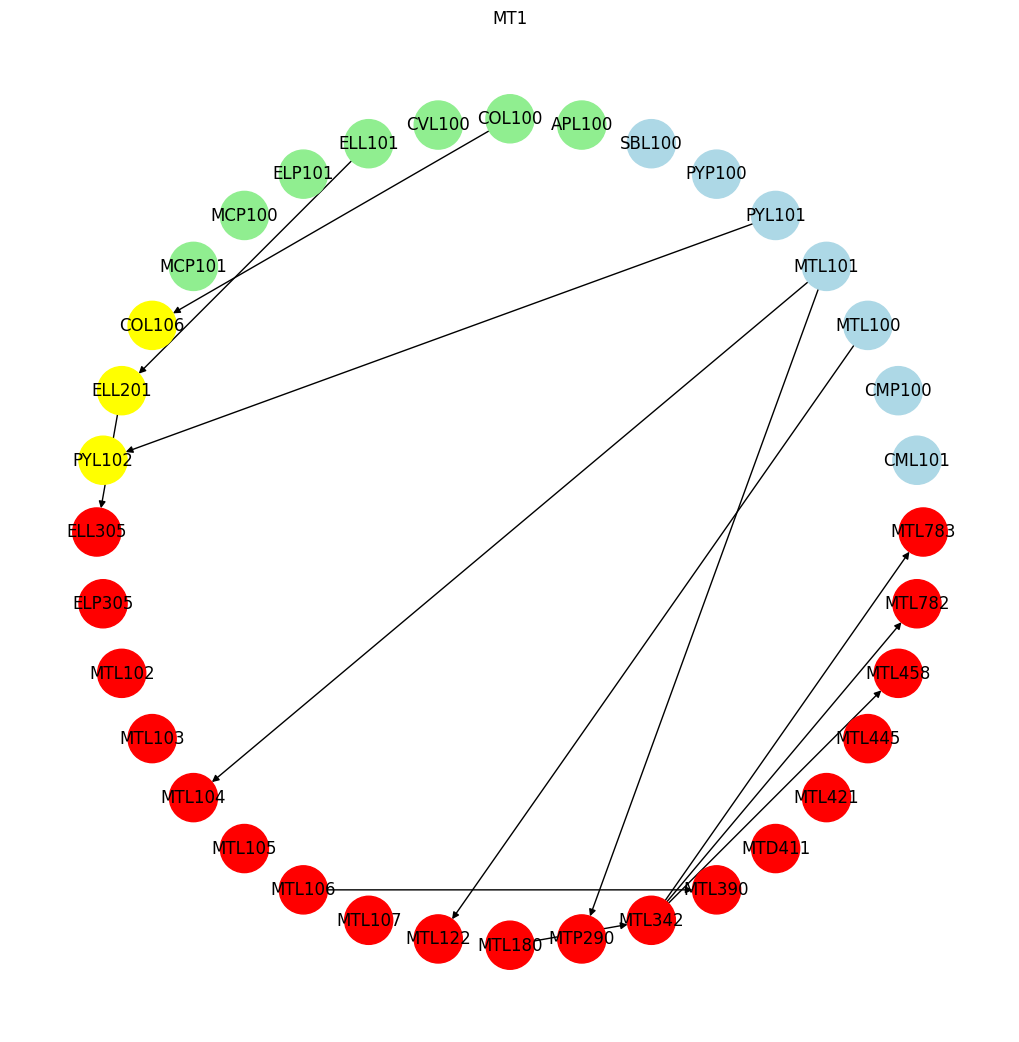

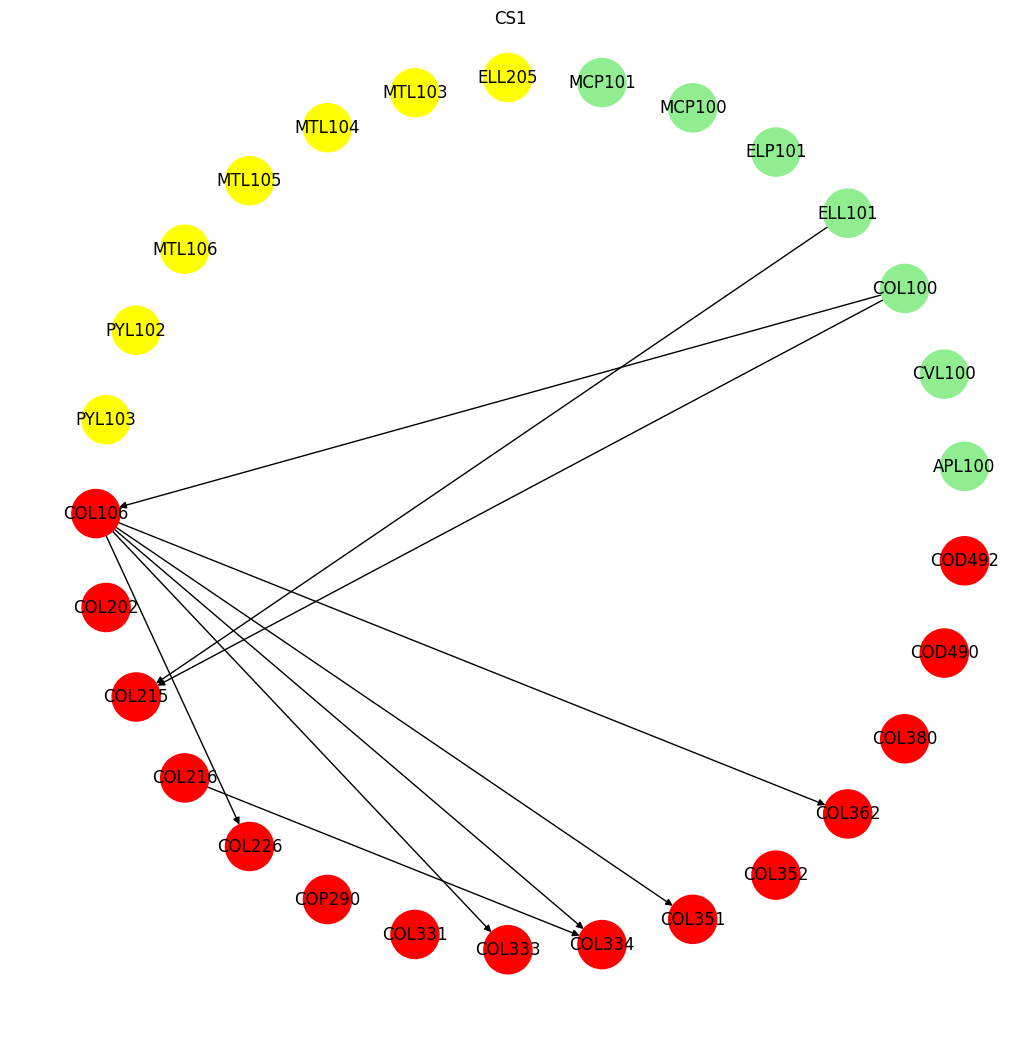

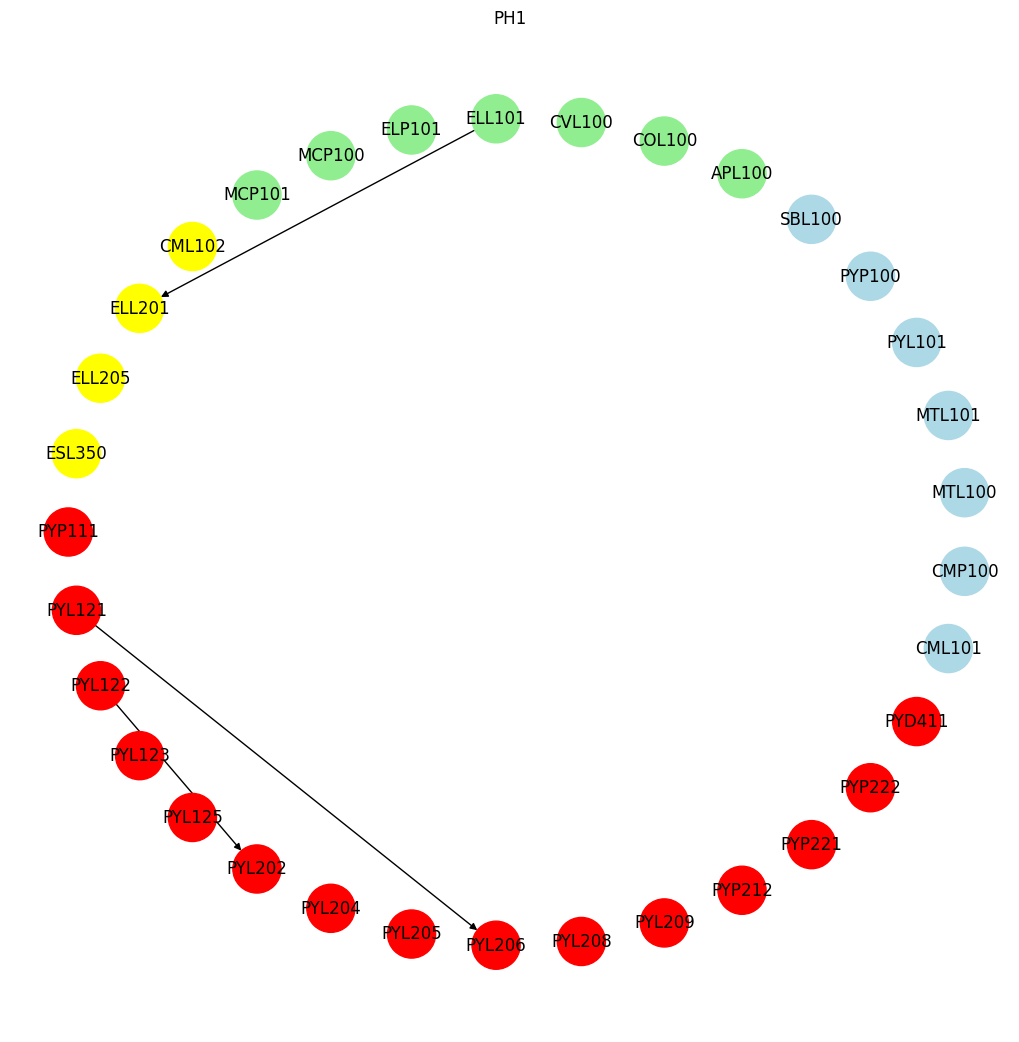

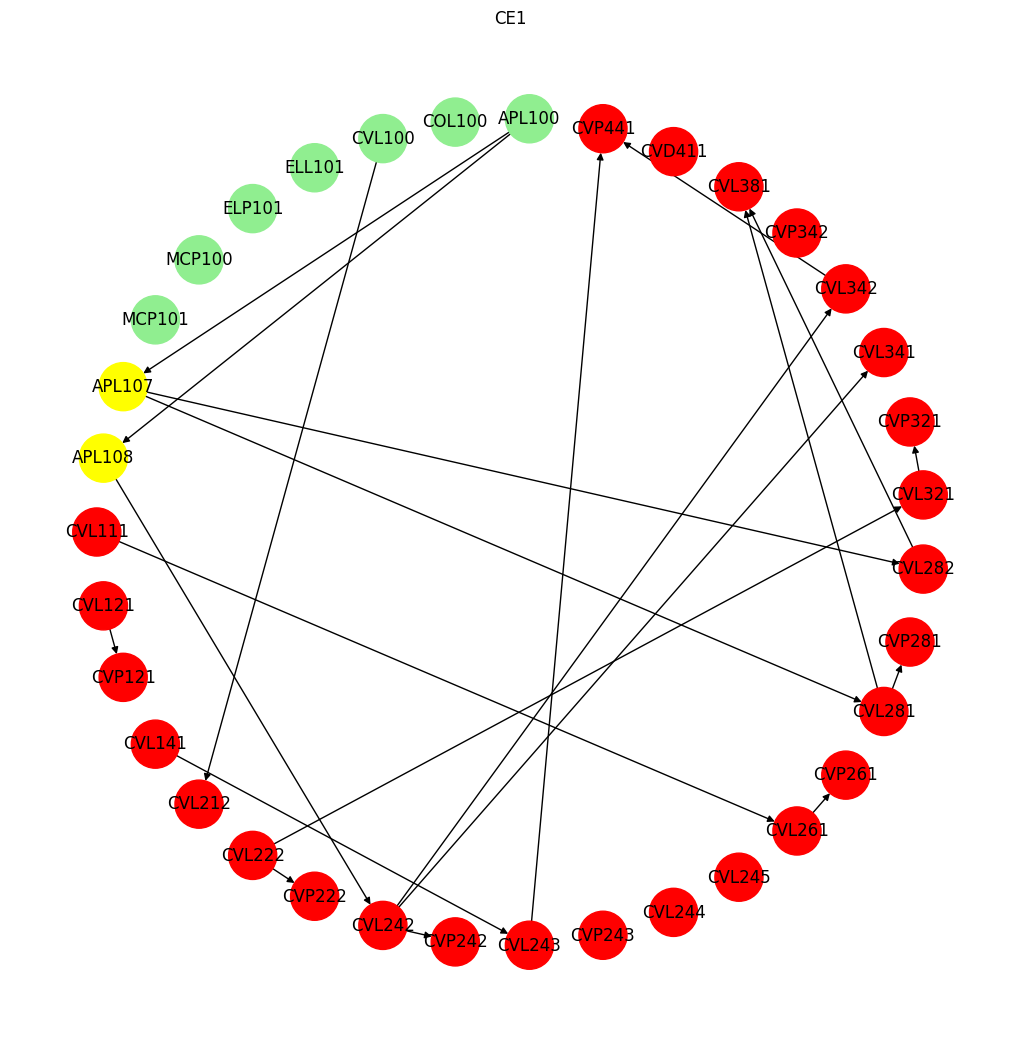

In [15]:
def combine(dep):
  colour={"Departmental Core":"red","Institute Core : Basic Sciences":"lightblue","Institute Core: Engineering Arts and Sciences":"lightgreen","Programme-Linked Basic":"yellow"}
  ls=[]
  gcolour=[]
  for a in loc[dep]:
    ls+=loc[dep][a]
    for x in loc[dep][a]:
      gcolour.append(colour[a])
  return (ls,gcolour)
def get_edges(ls,dep):
  edges=[]
  for a in ls:
    for b in cpre_req[a]:
      if(b in ls):
        edges.append((b,a))
  return edges
import networkx as nx
import matplotlib.pyplot as plt
def print_graph(dep):
  G = nx.DiGraph()
  all_cour,colour=combine(dep)
  G.add_nodes_from(all_cour)
  edges=get_edges(all_cour,dep)
  G.add_edges_from(edges)
  pos = nx.shell_layout(G)
  plt.figure(figsize=(10, 10))
  nx.draw(G, pos, with_labels=True, node_color=colour, node_size=1200, font_size=12, arrows=True)
  plt.title(dep)
  plt.show()
for x in departments:
  print_graph(x)